In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hishamakram125","key":"a8d818ec03f4097830fc4364acad7e47"}'}

In [0]:
!pip install kaggle


.  ..  .config	kaggle.json  sample_data


In [0]:
!mkdir .kaggle


mkdir: cannot create directory ‘.kaggle’: File exists


.  ..  .config	.kaggle  kaggle.json  sample_data


In [0]:
import json
token = {"username":"hishamakram125","key":"a8d818ec03f4097830fc4364acad7e47"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/root/.kaggle/kaggle.json


cp: cannot create regular file '/root/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


 95% 239M/251M [00:01<00:00, 176MB/s]
100% 251M/251M [00:01<00:00, 151MB/s]


In [0]:
!kaggle datasets download -d zalando-research/fashionmnist -p /content

 74% 51.0M/68.8M [00:01<00:00, 34.7MB/s]
100% 68.8M/68.8M [00:01<00:00, 64.5MB/s]


 95% 134M/141M [00:00<00:00, 226MB/s]
100% 141M/141M [00:00<00:00, 219MB/s]


In [0]:
!unzip \*.zip


Archive:  fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


In [0]:
# Import libraries
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [0]:
import pandas as pd
# Load training and test data into dataframes
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [0]:
data_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as np
# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))


In [0]:
# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)


In [0]:
print(np.shape(X_train))
np.shape(X_val)

(48000, 784)


(12000, 784)

In [0]:
# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [0]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [0]:
# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

In [0]:
import keras as k
cnn1.compile(loss=k.losses.categorical_crossentropy,
              optimizer=k.optimizers.Adam(),
              metrics=['accuracy'])

W0828 13:21:58.838812 140395342276480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0828 13:21:58.848203 140395342276480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
cnn1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [0]:
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

W0828 13:23:47.009850 140395342276480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 332us/step - loss: 0.5579 - acc: 0.8077 - val_loss: 0.4056 - val_acc: 0.8572
Epoch 2/10
48000/48000 [==============================] - 15s 304us/step - loss: 0.3658 - acc: 0.8706 - val_loss: 0.3461 - val_acc: 0.8808
Epoch 3/10
48000/48000 [==============================] - 15s 302us/step - loss: 0.3182 - acc: 0.8891 - val_loss: 0.3131 - val_acc: 0.8905
Epoch 4/10
48000/48000 [==============================] - 15s 302us/step - loss: 0.2876 - acc: 0.8983 - val_loss: 0.2945 - val_acc: 0.8957
Epoch 5/10
48000/48000 [==============================] - 15s 303us/step - loss: 0.2734 - acc: 0.9041 - val_loss: 0.2867 - val_acc: 0.8968
Epoch 6/10
48000/48000 [==============================] - 14s 301us/step - loss: 0.2525 - acc: 0.9102 - val_loss: 0.2718 - val_acc: 0.9018
Epoch 7/10
48000/48000 [==============================] - 15s 302us/step - loss: 0.2378 - acc: 0.9143 - val_loss: 0.

In [0]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.23978911049365997
Test accuracy: 0.9162


In [0]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [0]:
history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=10,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

Epoch 1/10
187/187 [==============================] - 19s 103ms/step - loss: 0.2776 - acc: 0.8976 - val_loss: 0.2914 - val_acc: 0.8897
Epoch 2/10
187/187 [==============================] - 19s 100ms/step - loss: 0.2729 - acc: 0.8988 - val_loss: 0.2966 - val_acc: 0.8908
Epoch 3/10
187/187 [==============================] - 19s 100ms/step - loss: 0.2692 - acc: 0.8992 - val_loss: 0.2975 - val_acc: 0.8883
Epoch 4/10
187/187 [==============================] - 19s 99ms/step - loss: 0.2721 - acc: 0.8984 - val_loss: 0.2909 - val_acc: 0.8919
Epoch 5/10
187/187 [==============================] - 19s 99ms/step - loss: 0.2660 - acc: 0.9000 - val_loss: 0.2912 - val_acc: 0.8925
Epoch 6/10
187/187 [==============================] - 19s 99ms/step - loss: 0.2653 - acc: 0.9003 - val_loss: 0.2897 - val_acc: 0.8959
Epoch 7/10
187/187 [==============================] - 18s 98ms/step - loss: 0.2639 - acc: 0.9009 - val_loss: 0.2897 - val_acc: 0.8898
Epoch 8/10
187/187 [==============================] - 19s 9

In [0]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.22584204968214036
Test accuracy: 0.9228


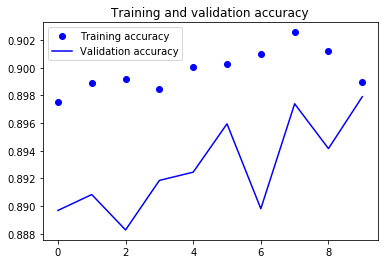

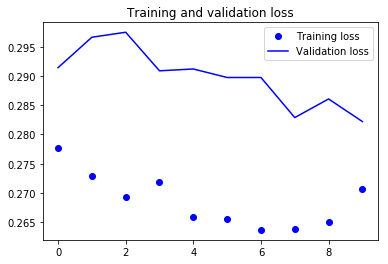

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# get the predictions for the test data
predicted_classes = cnn1.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.86      0.88      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.90      0.87      0.89      1000
     Class 3       0.90      0.96      0.93      1000
     Class 4       0.89      0.87      0.88      1000
     Class 5       0.97      0.99      0.98      1000
     Class 6       0.76      0.79      0.77      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



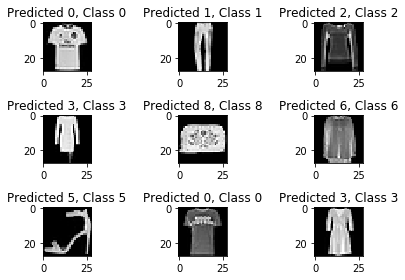

In [0]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

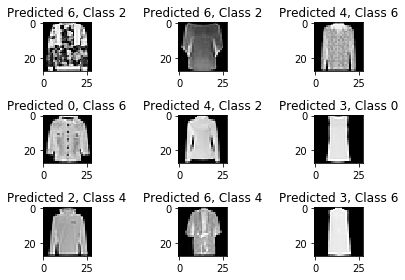

In [0]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

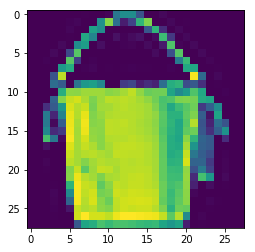

In [0]:
test_im1 = X_train[100]
plt.imshow(test_im1.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


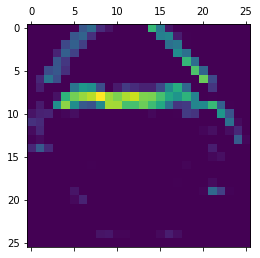

In [0]:
from keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in cnn1.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(input=cnn1.input, output=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im1.reshape(1,28,28,1))

# activation of the 1st convolution layer
first_layer_activation = activations[0]

# display the 4th channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

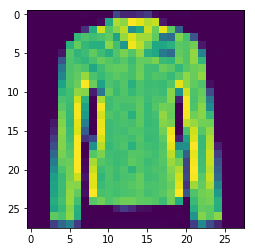

In [0]:
test_im2 = X_train[500]
plt.imshow(test_im2.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

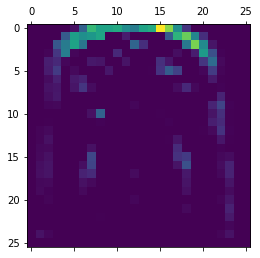

In [0]:
activations = activation_model.predict(test_im2.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

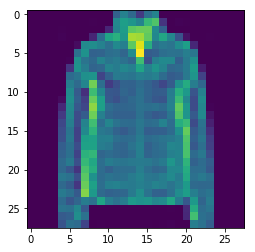

In [0]:
test_im3 = X_train[1000]
plt.imshow(test_im3.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

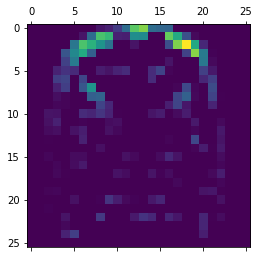

In [0]:

activations = activation_model.predict(test_im3.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

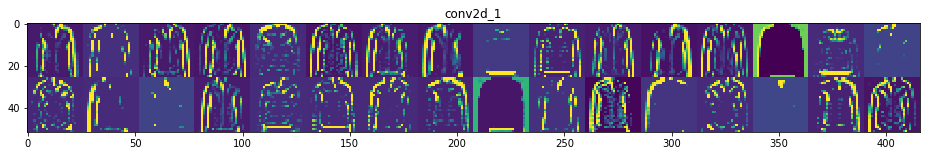

In [0]:
layer_names = []
for layer in cnn1.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')